In [1]:
import numpy as np
import Agents
from sweeper import Sweeper
from training_engine import ConfigDictConverter, test_policy_evaluation_error
import pickle
import matplotlib.pyplot as plt
import offline_data
from collections import defaultdict 
import os

np.set_printoptions(precision=3, linewidth=300, suppress=True)

results_path = 'results/20220806_772070/'

i_run = 0
sweeper = Sweeper(results_path + 'config.json')



if os.path.exists(results_path + "all_results.pkl"):  # use the merged file (faster)
    with open(results_path + "all_results.pkl", 'rb') as f:
        all_results = pickle.load(f)
else:
    all_results = []  # all_results is a list of dicts 
    # all_results[i] contains all the results for hyperparameter i
    # Repeats are stored in a list of lists within each key
    # e.g. all_results[0]['test_error'] is a list of lists. Each list corresponds to errors for one run.
    # Load all the parameter combinations for hyperparameter analysis
    for i_param in range(sweeper.total_combinations):
        results_param = defaultdict(list)
        print(i_param, sep=' ')
        # print(sweeper.search_idx(i_param))
        for i_rep in sweeper.search_idx(i_param):
            with open(results_path + f"res_{i_rep}.pkl", 'rb') as f:
                result = pickle.load(f)
                for key, value in result.items():
                    results_param[key].append(value)
        all_results.append(results_param)


print("loaded data")
# todo merge files so there are less files on compute canada 

# for i_param in range(sweeper.total_combinations):
#     result_reps = [np.mean(rep) for rep in all_results[i_param]['test_error']]
#     all_results[i_param]['avg_test_error'] = np.mean(result_reps)
    # this average is over the learning curve in one run and over multiple repeats    
    
    
# do some training here
# config_dict = sweeper.parse(i_run)
# cfg = ConfigDictConverter(config_dict)

# chkpt_idx = 0

# td_agent = Agents.OfflinePolicyEvalTDAgent(**cfg.config_dict)
# td_model_path = 'test_save_mountain/td_0_model_{chkpt_idx}.pyt'  # not an f-string so we can vary chkpt_idx later
# td_agent.load_model(f'test_save_mountain/td_0_model_{chkpt_idx}.pyt')


# mc_agent = Agents.OfflinePolicyEvalMCAgent(**cfg.config_dict)
# mc_model_path = 'test_save_mountain/mc_0_model_{chkpt_idx}.pyt'
# mc_agent.load_model(f'test_save_mountain/mc_0_model_{chkpt_idx}.pyt')




0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [2]:
### save results into one file 
with open(f'{results_path}all_results.pkl', 'wb') as file:
    pickle.dump(all_results, file, protocol=pickle.HIGHEST_PROTOCOL)


In [3]:
# Get summary value for each hyperparameter combination
for i_param in range(sweeper.total_combinations):
#     result_reps = [np.mean(rep[-10:]) for rep in all_results[i_param]['discounted_returns']]
#     all_results[i_param]['avg_return'] = np.mean(result_reps)
    if len(all_results[i_param]) > 0: #and sweeper.parse(i_param)['env']==env_name:
        all_results[i_param]['avg_test_error'] = np.mean(all_results[i_param]['test_error'])
        all_results[i_param]['num_reps_done'] = len(all_results[i_param]['test_error'])
        last_iter = 1000
        # all_results[i_param]['avg_return'] = np.mean(all_results[i_param]['discounted_returns'][:, -last_iter:])
        # all_results[i_param]['avg_undisc_return'] = np.mean(all_results[i_param]['returns'][:, -last_iter:])
        # all_results[i_param]['avg_num_steps'] = np.mean(all_results[i_param]['num_steps'][:,-last_iter:])
        # all_results[i_param]['num_reps_done'] = len(all_results[i_param]['discounted_returns'])
        # all_results[i_param]['crashed'] = False
    else:
        # all_results[i_param]['avg_return'] = None
        # all_results[i_param]['avg_undisc_return'] = None
        # all_results[i_param]['avg_num_steps'] = None
        all_results[i_param]['avg_test_error'] = None
        all_results[i_param]['num_reps_done'] = 0
        all_results[i_param]['crashed'] = True
    print(i_param, all_results[i_param]['num_reps_done'])


0 5
1 5
2 5
3 5
4 5
5 5
6 5
7 5
8 5
9 5
10 5
11 5
12 5
13 5
14 5
15 5
16 5
17 5
18 5
19 5
20 5
21 5
22 5
23 5
24 5
25 5
26 5
27 5
28 5
29 5
30 5
31 5
32 5
33 5
34 5
35 5
36 5
37 5
38 5
39 5
40 5
41 5
42 5
43 5
44 5
45 5
46 5
47 5
48 5
49 5
50 5
51 5
52 5
53 5
54 5
55 5
56 5
57 5
58 5
59 5
60 5
61 5
62 5
63 5
64 5
65 5
66 5
67 5
68 5
69 5
70 5
71 5
72 5
73 5
74 5
75 5
76 5
77 5
78 5
79 5
80 5
81 5
82 5
83 5
84 5
85 5
86 5
87 5
88 5
89 5
90 5
91 5
92 5
93 5
94 5
95 5
96 5
97 5
98 5
99 5
100 5
101 5
102 5
103 5
104 5
105 5
106 5
107 5
108 5
109 5
110 5
111 5
112 5
113 5
114 5
115 5
116 5
117 5
118 5
119 5
120 5
121 5
122 5
123 5
124 5
125 5
126 5
127 5
128 5
129 5
130 5
131 5
132 5
133 5
134 5
135 5
136 5
137 5
138 5
139 5
140 5
141 5
142 5
143 5
144 5
145 5
146 5
147 5
148 5
149 5
150 5
151 5
152 5
153 5
154 5
155 5
156 5
157 5
158 5
159 5
160 5
161 5
162 5
163 5
164 5
165 5
166 5
167 5
168 5
169 5
170 5
171 5
172 5
173 5
174 5
175 5
176 5
177 5
178 5
179 5
180 5
181 5
182 5
183 5
184 5


In [50]:
# Util functions
def get_param_idx(search_key):
    ''' Returns a list of indices for the parameter that matches the search key'''
    param_idxs = sweeper.search(search_key, only_first=False)
    if len(param_idxs) > 1:
        print("More than one match:", len(param_idxs))
        return None
    elif len(param_idxs) == 0:
        print("No matches")
        return None 
    return param_idxs[0]['ids']


In [80]:
### Compute linear regression error
import copy

# print(len(test_values), all_features.shape)
# print(agent.get_prediction(test_states[0]), test_values[0])
def test_error(agent, verbose=True):
    # preds = agent.get_prediction(test_states)
    # print(preds)
    # rmse = np.sqrt(np.mean((preds - test_values)**2))
    rmse = test_policy_evaluation_error(agent, test_states, test_values)
    if verbose:
        print("test error", rmse)
    return rmse


def linear_regression_test(agent, verbose=True):
    all_features = agent.get_features(test_states)
    param, squared_error, rank, _ = np.linalg.lstsq(all_features, test_values, rcond=None)
    
    linear_test_error = np.sqrt(np.mean( (np.dot(all_features, param) - test_values)**2))
    if verbose:
        print("feature rank", rank)
        print("linear test error", linear_test_error)
    return rank, linear_test_error
    

def compare_TD_and_MC(search_key, chkpt_idx, rep_num=0, verbose=True):
    ''' search_key contains all other hyperparameters except the algorithm, 
    which is set to TD and MC'''
    # todo how to also plot repeats
    search_key = copy.deepcopy(search_key)
    search_key['algorithm'] = "TDPolicyEval"
    param_idx = get_param_idx(search_key)[rep_num]

    # print("param", param_idx)
    cfg = ConfigDictConverter(sweeper.parse(param_idx))
    td_agent = Agents.OfflinePolicyEvalTDAgent(**cfg.config_dict)
    td_agent.load_model(results_path + f"res_{param_idx}_model_{chkpt_idx}.pyt")
    
    search_key['algorithm'] = "MCPolicyEval"
    del search_key['target_net_step_size']
    param_idx = get_param_idx(search_key)[rep_num]
    cfg = ConfigDictConverter(sweeper.parse(param_idx))
    mc_agent = Agents.OfflinePolicyEvalTDAgent(**cfg.config_dict)
    mc_agent.load_model(results_path + f"res_{param_idx}_model_{chkpt_idx}.pyt")
    
    if verbose:
        print("--- TD Agent --- checkpoint", chkpt_idx)
    test_error_td = test_error(td_agent, verbose)
    rank_td, lin_test_error_td = linear_regression_test(td_agent, verbose)
    if verbose:
        print("--- MC Agent ---")
    test_error_mc = test_error(mc_agent, verbose)
    rank_mc, lin_test_error_mc = linear_regression_test(mc_agent, verbose)
    return test_error_td, rank_td, lin_test_error_td, test_error_mc, rank_mc, lin_test_error_mc

# _ = compare_TD_and_MC(search_key, 199)
# _ = compare_TD_and_MC(search_key, 2099)

In [81]:
## Load offline data
env = "MountainCar"
data_path = 'data_generation/'
# test_states = np.load(path + 'Cartpole_test_states_0.npy')
# test_values = np.load(path + 'Cartpole_test_values_0.npy')
test_states = offline_data.load_test_states(data_path, env)  # moutn
test_values = offline_data.load_test_values(data_path, env)



In [82]:

search_key = {'algorithm': 'TDPolicyEval',
              'env': env,
              'step_size': 0.1,
              'target_net_step_size': 0.1,
              'layer_size': 64
             }
print(sweeper.search(search_key))
print(get_param_idx(search_key))

[{'ids': [160], 'run': 0, 'env': 'MountainCar', 'algorithm': 'TDPolicyEval', 'target_net_step_size': 0.1, 'step_size': 0.1, 'num_hidden_layers': 2, 'layer_size': 64, 'discount': 1.0, 'num_steps': 5000, 'max_steps_per_ep': 999, 'offline_training': True, 'save_freq': 100, 'save_model_freq': 200, 'num_repeats': 5, 'num_runs_per_group': 5}]
[160, 496, 832, 1168, 1504]


param 160
param 160
param 160
param 160
param 160
param 160
param 160
param 160
param 160
param 160
param 160
param 160
param 160
param 160
param 160
param 160
param 160
param 160
param 160
param 160
param 160
param 160
param 160
param 160
param 160
param 160


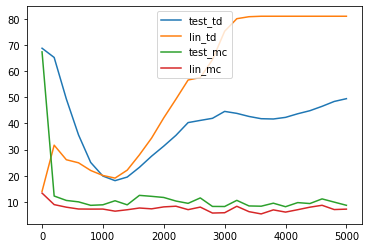

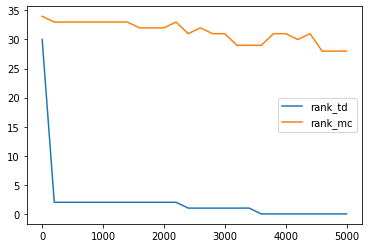

In [83]:
idxs = np.arange(0, 25)*200 + 199
idxs = np.insert(idxs,0,0)
results = []
for chkpt_idx in idxs:
    results.append(compare_TD_and_MC(search_key, chkpt_idx, rep_num=0, verbose=False))
results = np.array(results)

plt.plot(idxs, results[:,0], label='test_td')
plt.plot(idxs, results[:,2], label='lin_td')

plt.plot(idxs, results[:,3], label='test_mc')
plt.plot(idxs, results[:,5], label='lin_mc')
plt.legend()

plt.figure()
plt.plot(idxs, results[:,1], label='rank_td')
plt.plot(idxs, results[:,4], label='rank_mc')
plt.legend()


In [22]:
### Compute alignment as in Ehsan's paper
def compute_alignment(singular_vectors, y, singular_values, threshold):
    ''' Computes the alignment for the specified threshold 
    We rescale the singular values by the largest singular value. This ensures that the convergence rate
    bounds are comparable. See Ehsan's paper.'''
    scaled_singular_values = singular_values / np.max(singular_values)
    threshold_idx = np.searchsorted(-scaled_singular_values, -threshold)  # gives first index where value exceeds threshold
    alignments = np.transpose(singular_vectors[:, 0:threshold_idx]).dot(y)
    return np.sum(alignments**2)

chkpt_idx = None
def plot_alignment(chkpt_idx, model):
    if model == 'td':
        agent = Agents.OfflinePolicyEvalTDAgent(**cfg.config_dict)
        agent.load_model(td_model_path.format(chkpt_idx=chkpt_idx))
    elif model == 'mc':
        agent = Agents.OfflinePolicyEvalMCAgent(**cfg.config_dict)
        agent.load_model(mc_model_path.format(chkpt_idx=chkpt_idx))
    elif model == 'random':
        agent = Agents.OfflinePolicyEvalMCAgent(**cfg.config_dict)  # random untrained agent

    features = agent.get_features(test_states, add_bias=True)

    print("max feature", np.max(features), "max l2", np.max(np.linalg.norm(features,ord=2, axis=1)),
         "max l1", np.max(np.linalg.norm(features,ord=1, axis=1)))

    # scaled_features = features #/  np.max(np.linalg.norm(features,ord=2, axis=1)) # / np.max(features)

    singular_vectors, singular_values, _ = np.linalg.svd(features)
    print("singular values", singular_values[0:20])

    alignments = []
    thresholds = np.linspace(0, 1.01, 100)

    for x in thresholds:
        alignments.append(compute_alignment(singular_vectors, test_values/100, singular_values, x))
    
    print("Avg alignment", np.mean(alignments))
    plt.plot(thresholds, alignments, label=model+str(chkpt_idx))
    plt.ylim(150,350)

# how to summarize these 

max feature 4.681591 max l2 13.137147 max l1 86.99248
singular values [156.785  62.781  34.033  18.96   14.942  11.971   6.4     5.841   5.597   3.557   3.315   2.799   2.486   2.283   2.015   1.776   1.631   1.368   1.251   1.131]
Avg alignment 218.35116006315198
max feature 5.554041 max l2 16.899557 max l1 93.50393
singular values [283.621  58.731  39.291  17.648  14.612  10.786   9.383   6.687   4.775   3.583   3.192   2.878   2.487   2.082   1.973   1.719   1.448   1.293   1.127   0.969]
Avg alignment 248.9947526705602
max feature 6.5209684 max l2 22.048018 max l1 121.41485
singular values [397.098  61.155  49.282  30.137  17.986  13.397  10.235   8.391   4.641   4.406   3.873   3.106   2.692   2.389   1.979   1.866   1.692   1.461   1.256   1.127]
Avg alignment 262.26940136781246
max feature 8.250406 max l2 31.013184 max l1 191.21259
singular values [549.826 120.054  80.015  42.118  29.117  23.641  16.751  14.527  12.231   9.973   6.196   4.79    4.608   3.907   3.48    2.657   2.

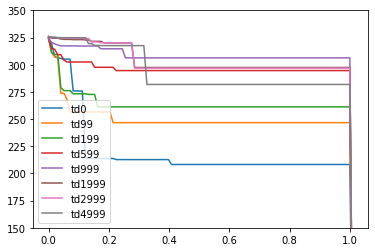

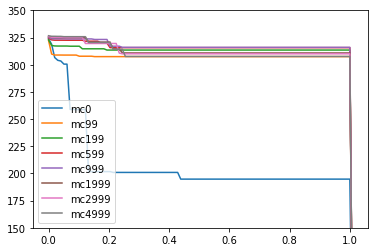

In [12]:
idxs = [0,99, 199, 599, 999, 1999, 2999, 4999]
for idx in idxs:
    plot_alignment(idx, 'td')
plt.legend()
plt.figure()
for idx in idxs:
    plot_alignment(idx, 'mc')
plt.legend()

max feature 3.172454 max l2 10.367496 max l1 69.35951
singular values [135.07   57.652  30.41   19.157  15.36   10.311   7.299   6.24    5.351   3.903   3.29    2.888   2.592   2.368   1.849   1.643   1.545   1.364   1.271   1.165]
Avg alignment 208.64396681731358


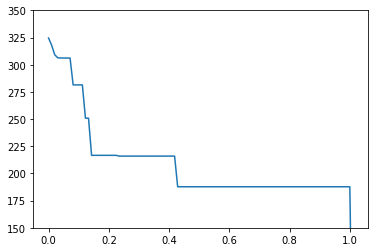

In [13]:
plot_alignment(0, model='random')

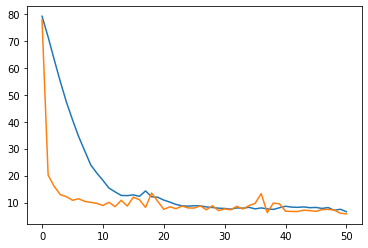

In [23]:
with open("test_save_mountain/td_0.pkl", 'rb') as file:
    td_results = pickle.load(file)
plt.plot(td_results['test_error'])
# print(results['test_error'])
with open("test_save_mountain/mc_0.pkl", 'rb') as file:
    mc_results = pickle.load(file)
plt.plot(mc_results['test_error'])

[{'algorithm': ['TDPolicyEval'], 'target_net_step_size': [0.01, 0.03, 0.1, 0.3, 1.0], 'num_combinations': 5}, {'algorithm': ['MCPolicyEval'], 'num_combinations': 1}]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 252, 253, 254, 255, 256, 257, 258, 259, 260, 261]
[12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 264, 265, 266, 267, 268, 269, 270, 271, 272, 273]
[24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 276, 277, 278, 279, 280, 281, 282, 283, 284, 285]
[36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 288, 289, 290, 291, 292, 293, 294, 295, 296, 297]
[48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 216

(5.0, 50.0)

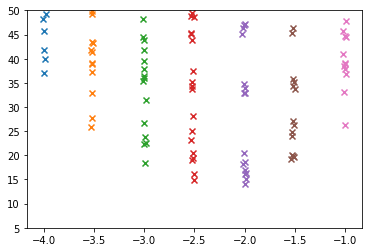

In [128]:
### Hyperparameter sensitivity curves

search_key = {'algorithm': 'TDPolicyEval',
              'env': env,
              'step_size': 0.1,
              'target_net_step_size': 0.1,
              'layer_size': 64
             }
alg = 'TDPolicyEval'
print(sweeper.config_dict['experiments'][0]['agent'][0]['alg_and_hyp'])

hyperparameter = 'step_size'
hyp_list = sweeper.config_dict['experiments'][0]['agent'][0][hyperparameter]
# hyp_list = sweeper.config_dict['experiments'][0]['agent'][0]['alg_and_hyp'][0][hyperparameter]
for hyp_value in hyp_list:
    
    search_hyp = {hyperparameter: hyp_value, 
                 "algorithm": alg}
    match_idxs = [match['ids'][0] for match in sweeper.search(search_hyp, only_first=True)]
    print(match_idxs)
    results = []
    for param_idx in match_idxs:
        results.append(all_results[param_idx]['avg_test_error'])
    
    if 'step_size' in hyperparameter:
        hyp_value = np.log10(hyp_value)
    xs = hyp_value*np.ones(len(results)) + np.random.normal(0, 0.01, len(results))

        
    plt.scatter(xs, results, marker='x')


plt.ylim(5,50)